In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Weight_Height_knn.csv")
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [3]:
df.isnull().sum()

Weight(x2)kg    0
Height(y2)cm    0
Class           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [6]:
a="75kg"

In [8]:
int(a.replace("kg",""))

75

In [29]:
def convert_int(text):
    text=text.lower()
    if "kg" in text:
        return int(text.replace("kg",""))
    else:
        return int(text.replace("cm",""))

In [46]:
def convert_int2(text):
    num_string="".join(x for x in text if x.isdigit())
    return int(num_string)

In [30]:
convert_int("75 CM")

75

In [11]:
(lambda a:int(a.replace("kg","")))("101kg")

101

In [33]:
df['Weight(x2)kg']=df['Weight(x2)kg'].apply(convert_int)
df['Height(y2)cm']=df['Height(y2)cm'].apply(convert_int)

In [28]:
# df['Weight(x2)kg'].apply(lambda a:int(a.replace("kg","")))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [36]:
df.head()

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


In [52]:
X=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

In [54]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [55]:
clf.fit(X,y)

KNeighborsClassifier(metric='euclidean')

In [56]:
test_value=[[56,180]]
clf.predict(test_value)

array(['Underweight'], dtype=object)

In [57]:
y_p=clf.predict(X)
y_p  #Predicted Value

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [58]:
y   # Actual Value

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [59]:
23/25

0.92

In [60]:
# Classification Metrics

# Accuracy Score
# Confusion Matrix
# Classification Report
# Precision Score
# Recall Score
# F1 Score

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
accuracy_score(y,y_p)

0.92

In [67]:
confusion_matrix(y,y_p)

array([[9, 0, 1],
       [1, 6, 0],
       [0, 0, 8]])

In [71]:
pd.DataFrame(confusion_matrix(y,y_p),index=['Normal_Ac','Overweight_Ac','Underweight_Ac'],
             columns=['Normal_Pr','Overweight_Pr','Underweight_Pr'])

,Normal_Pr,Overweight_Pr,Underweight_Pr
Normal_Ac,9,0,1
Overweight_Ac,1,6,0
Underweight_Ac,0,0,8


In [65]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [78]:
(0.9+1.0+0.89)/3

0.93

In [79]:
((0.9*10)+(1*7)+(0.89*8))/25

0.9248000000000001

In [77]:
print("Precision for Normal is :",9/10)
print("Recall for Normal is :",9/10)
print("Precision for Overweight is :",6/6)
print("Recall for Overweight is :",6/7)
print("Precision for Underweight is :",8/9)
print("Recall for Overweight is :",8/8)

Precision for Normal is : 0.9
Recall for Normal is : 0.9
Precision for Overweight is : 1.0
Recall for Overweight is : 0.8571428571428571
Precision for Underweight is : 0.8888888888888888
Recall for Overweight is : 1.0


In [ ]:
# accuracy does not work well, when the data is imbalanced
# one class has more no of data points than the other classes

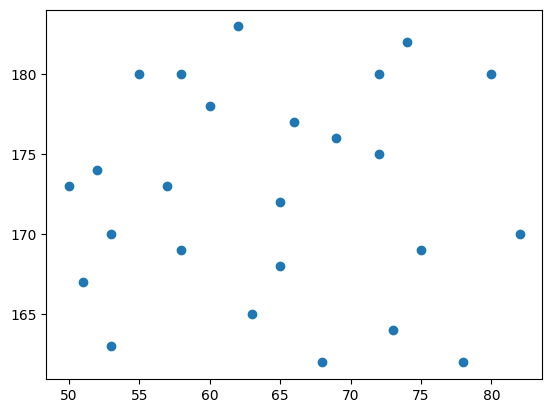

In [96]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])
plt.show()

In [89]:
df_n=df[df['Class']=='Normal']
df_o=df[df['Class']=='Overweight']
df_u=df[df['Class']=='Underweight']

In [92]:
df_u

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
4,50,173,Underweight
7,58,180,Underweight
10,52,174,Underweight
14,62,183,Underweight
17,60,178,Underweight
20,53,170,Underweight
24,55,180,Underweight


In [91]:
df_o

,Weight(x2)kg,Height(y2)cm,Class
2,75,169,Overweight
5,82,170,Overweight
8,68,162,Overweight
12,78,162,Overweight
16,80,180,Overweight
19,73,164,Overweight
22,72,175,Overweight


In [90]:
df_n

,Weight(x2)kg,Height(y2)cm,Class
1,66,177,Normal
3,69,176,Normal
6,65,172,Normal
9,63,165,Normal
11,58,169,Normal
13,65,168,Normal
15,72,180,Normal
18,57,173,Normal
21,74,182,Normal
23,53,163,Normal


In [108]:
test_value

[[56, 180]]

In [111]:
test_value[0][1]

180

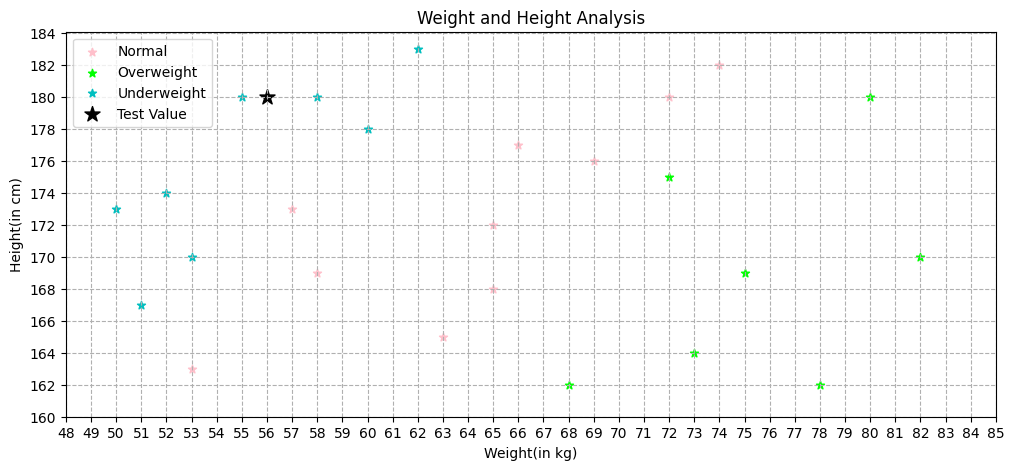

In [115]:
plt.figure(figsize=(12,5))
plt.scatter(df_n['Weight(x2)kg'],df_n['Height(y2)cm'],label="Normal",color="pink",marker="*")
plt.scatter(df_o['Weight(x2)kg'],df_o['Height(y2)cm'],label="Overweight",color="lime",marker="*")
plt.scatter(df_u['Weight(x2)kg'],df_u['Height(y2)cm'],label="Underweight",color="c",marker="*")
plt.scatter(test_value[0][0],test_value[0][1],label="Test Value",color='k',marker="*",s=130)
plt.legend()
plt.xlabel("Weight(in kg)")
plt.ylabel("Height(in cm)")
plt.title("Weight and Height Analysis")
plt.xticks(np.arange(48,86,1))
plt.yticks(np.arange(160,186,2))
plt.grid(linestyle="--")
plt.show()

In [117]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [119]:
test_value

[[56, 180]]

In [118]:
clf.kneighbors(test_value)

(array([[1.        , 2.        , 4.47213595, 6.70820393, 7.07106781]]),
 array([[24,  7, 17, 14, 18]]))

In [120]:
clf.predict_proba(test_value)

array([[0.2, 0. , 0.8]])

In [125]:
import joblib
joblib.dump(clf,'clf_knn_model')

['clf_knn_model']

In [128]:
%%writefile knn_app.py
import joblib
import streamlit as st
clf_knn=joblib.load("clf_knn_model")
st.title("Weight Height Classifier")
wt=st.slider("Enter the weight of the person(in kg)",min_value=40,max_value=100,value=55,step=1)
ht=st.slider("Enter the height of the person(in cm)",min_value=135,max_value=190,value=165,step=1)

if (st.button("PREDICT CLASS")):
    op=clf_knn.predict([[wt,ht]])
    st.subheader(f'The person having weight as {wt}kg and height as {ht}cm 
    is categorized as {op[0]}.')

Overwriting knn_app.py


In [141]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)